# Fake News Detection

## Installing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn

## Loading the data

In [2]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

In [3]:
print(data_true.sample(3))

                                                   title  \
3724   Mexico welcomes NAFTA re-negotiation, expects ...   
18292  Brazil detains Italian fugitive Battisti leavi...   
3390   Panama's president to visit Trump at White Hou...   

                                                    text       subject  \
3724   MEXICO CITY (Reuters) - Mexico’s government we...  politicsNews   
18292  BRASILIA (Reuters) - Brazilian highway police ...     worldnews   
3390   WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   

                   date  
3724      May 18, 2017   
18292  October 4, 2017   
3390      June 5, 2017   


### Data Preview 

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [6]:
data_fake["class"]=0
data_true['class']=1

In [7]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [8]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)

In [9]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [10]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30320\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\KIIT\AppData\Local\Temp\ipykernel_30320\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [11]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### Dropping the unrequired columns

In [15]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [16]:
# Counting the missing values
data.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [17]:
data = data.sample(frac = 1)

In [18]:
data.head()

,text,class
8481,Rarely in life do you see people go so perfect...,0
16303,"VP Joe Biden: Yeah, I m going to run in 2020....",0
16227,"Sunday, GotNews reported that the primary sour...",0
10221,Esteemed Democratic Attorney Alan Dershowitz U...,0
23324,Shawn Helton 21st Century WireOrlando s Puls...,0


In [19]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [20]:
data.columns

Index(['text', 'class'], dtype='object')

In [21]:
data.head()

,text,class
0,Rarely in life do you see people go so perfect...,0
1,"VP Joe Biden: Yeah, I m going to run in 2020....",0
2,"Sunday, GotNews reported that the primary sour...",0
3,Esteemed Democratic Attorney Alan Dershowitz U...,0
4,Shawn Helton 21st Century WireOrlando s Puls...,0


## Preprocessing Text

#### Creating a function to convert the text in lowercase, remove the extra space, special characters, etc.

In [22]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r"\W", " ", text)
    text = re.sub(r"https?://\S+|www\.\S+", '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text) 
    return text

In [23]:
data['text'] = data['text'].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [24]:
x = data['text']
y = data['class']

## Training the model

#### Splitting the dataset into training set and testing set. 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

### Extracting Features from the Text

#### Convert text to vectors

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [29]:
pred_lr = LR.predict(xv_test)

In [30]:
LR.score(xv_test, y_test)

0.9858288770053476

In [31]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5943
           1       0.98      0.99      0.98      5277

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [34]:
pred_dt = DT.predict(xv_test)

In [35]:
DT.score(xv_test, y_test)

0.9955436720142602

In [36]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5943
           1       0.98      0.99      0.98      5277

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Gradient Boost Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [45]:
pred_gb = GB.predict(xv_test)

In [46]:
GB.score(xv_test, y_test)

0.9964349376114082

In [47]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5943
           1       0.99      1.00      1.00      5277

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
pred_rf = RF.predict(xv_test)

In [51]:
RF.score(xv_test, y_test)

0.9909982174688057

In [52]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5943
           1       0.99      0.99      0.99      5277

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Testing the Model

In [53]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

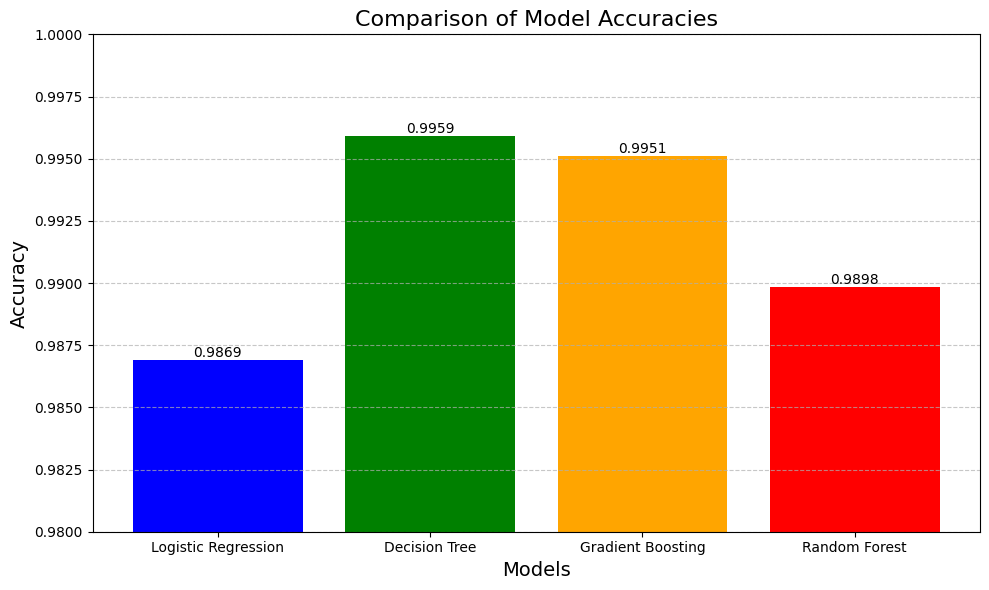

In [57]:
models = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracy_scores = [0.9868983957219252, 0.9959001782531194, 0.9950980392156863, 0.9898395721925134]

# Creating a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.98, 1.00)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Model Testing With Manual Entry

In [56]:
news = str(input()) 
manual_testing(news)

 Federal health officials told the AP they have not received any reports of Ebola cases at the Nevada event. A screenshot of a supposed post from the Centers for Disease Control and Prevention confirming such cases was fabricated. And there is no record of a national emergency being declared. The claims emerged after summer storm left muddy roads flooded, stranding tens of thousands of partygoers; event organizers let traffic flow out of the main road Monday afternoon. “So it was announced earlier that Burning Man was declared a national emergency because it was flooded, and so they sent in FEMA,” a woman claims in a TikTok video shared on Instagram, suggesting the development was suspicious. The AP found no record, including on federal websites and in White House announcements, of a national emergency declaration and FEMA confirmed that it was not involved in the situation. “No FEMA personnel or assets have been deployed to the Burning Man festival and there are no requests from local



LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


In [60]:
news = str(input()) 
manual_testing(news)

 U.S. budget fight looms, Republicans flip their fiscal script. WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge tax overhaul, on Friday downplayed concerns that the legislation would add to the federal budget deficit.




LR Predicition: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction:Not A Fake News


In [58]:
news=str(input())
manual_testing(news)

 MOSCOW (Reuters) - Russiaâ€™s former ambassador to Washington, Sergei Kislyak, said on Saturday his conversations with former White House national security adviser Michael Flynn had been transparent and focused on matters of U.S.-Russia cooperation. Kislyak ended his tenure in Washington in July but remains a key figure in ongoing U.S. investigations into Moscowâ€™s alleged meddling in the 2016 presidential election. Flynn was forced to resign in February after it became known that he had failed to disclose the content of conversations he had with Kislyak and misled U.S. Vice-President Mike Pence about their meetings. â€œWe only spoke about the most simple things ... but the communication was completely correct, calm, absolutely transparent. In any case, there were no secrets on our side,â€ Kislyak said during a panel discussion on Russian television. â€œThere are a number of issues which are important for cooperation between Russia and the United States - most of all, terrorism. And



LR Predicition: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction:Not A Fake News


In [59]:
news=str(input())
manual_testing(news)

  Watch This Awesome Mashup of Michael Flynn Leading The ‘Lock Her Up’ Chant As He Goes Off To Court (VIDEO)




LR Predicition: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction:Fake News


In [63]:
news=str(input())
manual_testing(news)

 WASHINGTON (Reuters) - Two Republican lawmakers told the U.S. Department of Justice on Tuesday that they want to question three senior FBI officials about an investigation of then-Democratic presidential candidate Hillary Clinton over her handling of classified information while she was secretary of state. The lawmakers, who are leading a joint probe into the Clinton investigation, said in a letter to Attorney General Jeff Sessions and his deputy, Rod Rosenstein, that they wanted to speak with FBI Deputy Director Andrew McCabe, FBI Chief of Staff Jim Rybicki and FBI counsel Lisa Page beginning on Thursday. The FBI declined to comment on the letter and referred reporters to the Justice Department. The request to meet the FBI officials for “transcribed interviews” was made after Republicans obtained more than 300 text messages sent last year between Page and FBI agent Peter Strzok critical of then-Republican presidential candidate Donald Trump. The text messages called him an “idiot” an



LR Predicition: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction:Not A Fake News
